# Import Packages 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})

In [ ]:
# Set seeds for numpy and tensorflow
tf.random.set_seed(12)
np.random.seed(12)

# Pull the data sets (daily time frame)

In [ ]:
daily_data_url = "https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Merged_datasets/bit_eth_xrp_daily.csv"
daily_data = pd.read_csv (daily_data_url)
daily_data

,time,BTC_open,BTC_close,BTC_vol,ETHER_open,ETHER_close,ETHER_vol,XRP_open,XRP_close,XRP_vol
0,2017-05-19 00:00:00+00:00,1941.900000,1966.500000,23001.542773,98.550000,124.40,257956.362939,0.37999,0.32498,2.130933e+06
1,2017-05-20 00:00:00+00:00,1966.500000,2059.300000,21690.022393,124.490000,123.03,122882.371427,0.32499,0.34716,3.608873e+06
2,2017-05-21 00:00:00+00:00,2059.300000,2026.600000,17221.878675,123.490000,146.14,220184.308469,0.34700,0.32700,2.597807e+06
3,2017-05-22 00:00:00+00:00,2027.000000,2087.300000,57231.824243,146.140000,154.92,473706.454399,0.32700,0.29717,6.474949e+06
4,2017-05-23 00:00:00+00:00,2087.300000,2249.600000,22521.559138,155.160000,168.24,144988.858583,0.29912,0.32158,3.255225e+06
...,...,...,...,...,...,...,...,...,...,...
1169,2020-07-31 00:00:00+00:00,11122.785171,11350.000000,5830.145883,335.360000,346.82,145813.101733,0.24461,0.25983,1.913230e+07
1170,2020-08-01 00:00:00+00:00,11350.000000,11804.744013,10574.542594,346.814955,387.15,214176.492612,0.25970,0.29103,5.774864e+07
1171,2020-08-02 00:00:00+00:00,11805.000000,11053.772562,13217.636459,387.030000,371.87,322415.937958,0.29127,0.28764,9.968299e+07
1172,2020-08-03 00:00:00+00:00,11058.838777,11226.521728,4085.500508,372.060418,385.68,126895.684080,0.28792,0.30974,4.432413e+07


In [ ]:
data = daily_data[["time", "BTC_close", "BTC_vol", "ETHER_close", "ETHER_vol", "XRP_close", "XRP_vol" ]]
data

,time,BTC_close,BTC_vol,ETHER_close,ETHER_vol,XRP_close,XRP_vol
0,2017-05-19 00:00:00+00:00,1966.500000,23001.542773,124.40,257956.362939,0.32498,2.130933e+06
1,2017-05-20 00:00:00+00:00,2059.300000,21690.022393,123.03,122882.371427,0.34716,3.608873e+06
2,2017-05-21 00:00:00+00:00,2026.600000,17221.878675,146.14,220184.308469,0.32700,2.597807e+06
3,2017-05-22 00:00:00+00:00,2087.300000,57231.824243,154.92,473706.454399,0.29717,6.474949e+06
4,2017-05-23 00:00:00+00:00,2249.600000,22521.559138,168.24,144988.858583,0.32158,3.255225e+06
...,...,...,...,...,...,...,...
1169,2020-07-31 00:00:00+00:00,11350.000000,5830.145883,346.82,145813.101733,0.25983,1.913230e+07
1170,2020-08-01 00:00:00+00:00,11804.744013,10574.542594,387.15,214176.492612,0.29103,5.774864e+07
1171,2020-08-02 00:00:00+00:00,11053.772562,13217.636459,371.87,322415.937958,0.28764,9.968299e+07
1172,2020-08-03 00:00:00+00:00,11226.521728,4085.500508,385.68,126895.684080,0.30974,4.432413e+07


In [ ]:
# Convert Date column to Date format.  
#data["time"] = pd.to_datetime(data["time"], dayfirst=True )  #, format ='%d/%m/%y', errors='ignore'
#Set Date as Index
#data = data.set_index('time')#.asfreq('d')
#data

# Data Distribution

# Correlation Plots


Text(0.5, 1.0, 'Correlation Plot')

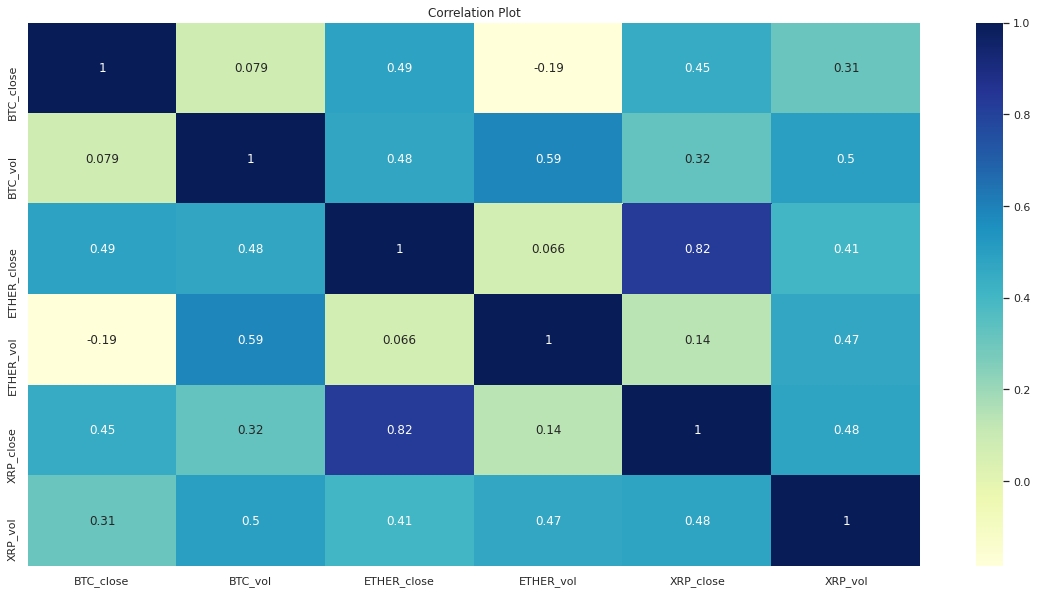

In [ ]:
#Correlation plot
corrMatrix = data.corr()
sns.heatmap(corrMatrix, cmap="YlGnBu", annot=True)
plt.title('Correlation Plot')

# Standard Scaling Plot

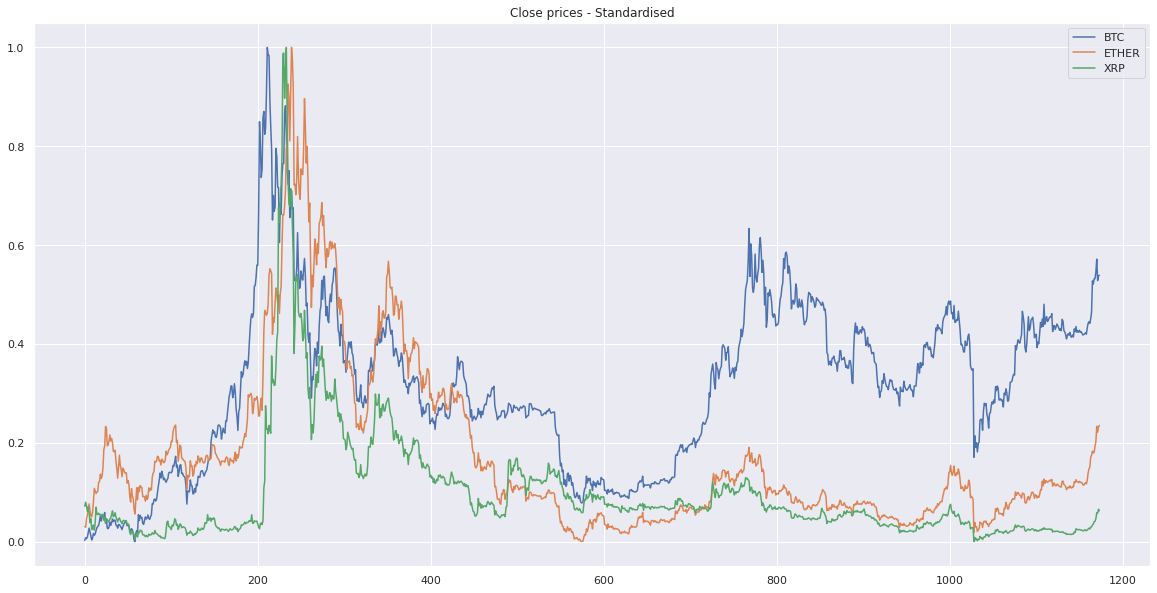

In [ ]:
# Compute the same graph as above but standardise the data first
from sklearn import preprocessing

# Create the Scaler object
scaler = preprocessing.StandardScaler()

min_max_scaler = preprocessing.MinMaxScaler()

data_close_prices = data[['BTC_close', 'XRP_close', 'ETHER_close']]

data_close_prices = pd.DataFrame(min_max_scaler.fit_transform(data_close_prices))

data_close_prices.columns = ["BTC_close", "XRP_close", "ETHER_close"]

data_close_prices
plt.plot(data_close_prices['BTC_close'], label = "BTC") 
plt.plot(data_close_prices['ETHER_close'], label = "ETHER") 
plt.plot(data_close_prices['XRP_close'], label = "XRP") 
plt.title('Close prices - Standardised' )
plt.legend()
plt.show()

# Seasonal Decomposition


https://www.machinelearningplus.com/time-series/time-series-analysis-python/

In [ ]:
# Convert Date column to Date format.  
df = data 
df["time"] = pd.to_datetime(df["time"], dayfirst=True )  #, format ='%d/%m/%y', errors='ignore'

# Create variables for day of month 
df['Month'] = df['time'].dt.month_name()
df.Month = df.Month.astype('category') 
df['Month'] = df['Month'].cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


#Set Date as Index
df = df.set_index('time')#.asfreq('d')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1174 entries, 2017-05-19 00:00:00+00:00 to 2020-08-04 00:00:00+00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   BTC_close    1174 non-null   float64 
 1   BTC_vol      1174 non-null   float64 
 2   ETHER_close  1174 non-null   float64 
 3   ETHER_vol    1174 non-null   float64 
 4   XRP_close    1174 non-null   float64 
 5   XRP_vol      1174 non-null   float64 
 6   Month        1174 non-null   category
dtypes: category(1), float64(6)
memory usage: 65.8 KB
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,BTC_close,BTC_vol,ETHER_close,ETHER_vol,XRP_close,XRP_vol,Month
time,,,,,,,
2017-05-19 00:00:00+00:00,1966.500000,23001.542773,124.40,257956.362939,0.32498,2.130933e+06,May
2017-05-20 00:00:00+00:00,2059.300000,21690.022393,123.03,122882.371427,0.34716,3.608873e+06,May
2017-05-21 00:00:00+00:00,2026.600000,17221.878675,146.14,220184.308469,0.32700,2.597807e+06,May
2017-05-22 00:00:00+00:00,2087.300000,57231.824243,154.92,473706.454399,0.29717,6.474949e+06,May
2017-05-23 00:00:00+00:00,2249.600000,22521.559138,168.24,144988.858583,0.32158,3.255225e+06,May
...,...,...,...,...,...,...,...
2020-07-31 00:00:00+00:00,11350.000000,5830.145883,346.82,145813.101733,0.25983,1.913230e+07,July
2020-08-01 00:00:00+00:00,11804.744013,10574.542594,387.15,214176.492612,0.29103,5.774864e+07,August
2020-08-02 00:00:00+00:00,11053.772562,13217.636459,371.87,322415.937958,0.28764,9.968299e+07,August
